In [1]:
import matplotlib
import matplotlib.pyplot as plt
import torch
import torch.distributions

from torch.nn.functional import binary_cross_entropy_with_logits as bce
import os
import sys
import time
import h5py
from matplotlib import cm
from scipy import stats
import numpy as np
from power_spec import *
from models import *
from helpers import *
from diag import *
from plotting_fns import *
from powerbox import get_power
import Pk_library as PKL
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

from scipy.stats import t


power_spec.py:12: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/opt/apps/intel18/python2/2.7.16/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/opt/apps/intel18/python2/2.7.16/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home1/06147/pberger/.virtualenvs/pytorch_env/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home1/06147/pberger/.virtualenvs/pytorch_env/lib/python2.7/site-packages/traitlets/config/application.py", line 664, in launch_instance
    app.start()
  File "/home1/06147/pberger/.virtualenvs/pytorch_env/lib/python2.7/site-package

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
# timestr = '20190512-000731'
timestr_redshift = '20190510-012809'
# timestr = '20190512-164511' # 16384 -- 42 good
# timestr = '20190509-221238' #8192
timestr2 = '20190516-154953' # 16384, wgan_gp -- 43 low var., 45 a bit above but good

timestr8192 = '20190602-205152' # 8192 -- 67 good, 68/66 bad, 95 okay, 93 good too w/ pixel cut
timestr16384 = '20190602-204848' # 16384 -- 49 pretty good
timestr4096 = '20190603-060857' # 4096 # 127 pretty good w/ pixel cut, 199 too
timestr2048 = '20190604-024333' # 2048 - 392 w/ pixel cut

timestr = '20190727-164024'
timestr = '20190729-033958' # extra conv layers
timestr = '20190730-024129' # omega m / s8 grid
timestr_z10 = '20190806-223055'
timestr_flip_s = '20190807-102234'
timestr_batch16 = '20190809-130937'
timestr_stride1 = '20190813-230225'
timestr_long_simple = '20190904-212340'
ts = '20190814-013819'
ts2 = '20190814-013819' # epoch 25
ts3 = '20190814-091511'
ts4 = '20190814-180141'

latent500 = '20190815-130845'
latent50 = '20190815-223201' 
timestr_hi_scale = '20190817-212936'
timestr_hi_scale2 = '20190818-203227'
timestr_big_sx_scaling = '20190818-211612' # 50, 51
timestr_sx_4 = '20190822-232243'
timestr_sx_10 = '20190822-230228'
timestr_gamma0p7_simple = '20190906-022209'
timestr_gamma0p7_200_20 = '20190912-161312' # 87, 99
timestr_gamma0p7_200_4 = '20190912-184744'


timestr_pw_20_0p7 = '20190924-021733'
timestr_50_0p7 = '20190924-112608'
timestr_50_0p3 = '20190925-125700'
timestr_4_0p3 = '20190927-141933'


timestr_latentdim200 = '20191223-002852' # 50, 55, 105
timestr_conv1 = '20191222-192027'
timestr_conv0 = '20191222-193216'
timestr_conv2 = '20191222-193317'
# big = '20190814-180528'

timestr_latentdim100_df20 = '20191225-131947'
timestr_latentdim100_df10 = '20191225-161648'
timestr_100_df10_a40 = '20191225-180626'

timestr_100_df10_a40_lr9 = '20191226-013243'
timestr_100_df10_a40_lr5 = '20191226-023925' # 145 is good
timestr_100_df10_a45 = '20191226-123919' # 133 accurate, 143 @ 0.985 very good
timestr_100_gaussian_a45 = '20191226-165322'
timestr_100_df5_a45 = '20191226-204324'
timestr_100_df2_a45 = '20191227-001843'


timestr_df10_16 = '20200108-153733'
timestr_df10_8 = '20200108-154357'
timestr_df10_4 = '20200108-160806'

timestr_dontknow = '20191226-020510'
timestr_100_df15_a45 = '20191228-174123'

timestr_100_df10_a30_128 = '20200109-144302'

timestr_100_df10_a45_300epoch = '20200109-114418'

tstr_a40_gaussian_128_bs32 = '20200113-222701'

tstr_a40_gaussian_128_bs16 = '20200113-221603'


tstr_128_bs16_a10_gamma0p5 = '20200113-220611'

tnow_z3 = '20200114-225440'

t_128_a100 = '20200115-131929'
t_128_a40 = '20200115-130850'
t_128_a200 = '20200115-151137'

tidk = '20200115-165724' # fac=4, does not work

t_z210 = '20200114-213723'

t_z210_2 = '20200117-104826'


t_latentdim_120 = '20200109-103503'

t_z_p5_p25_0 = '20200117-122131'

t_z_12sims = '20200117-133919'

t_z_schedule12 = '20200117-154228'

# tidk = '20200117-122057'

t_z2_a4 = '20200118-145224' # 87 is pretty good, 90 is good
t_z2_a20 = '20200118-142640'

t_z2_a4_fac0p2 = '20200118-161724'
t_z_age = '20200118-203644' # sux


t_zp5_a30 = '20200120-215211'
t_z_p5_p25_0_a30 = '20200120-214458'

t_z3_0_a10 = '20200121-101853'

t_z_p5_p25_0_a10_sep12 = '20200121-095719' # 142 pretty good
t_z_p5_p25_0_a10_same12 = '20200121-091624'

t_z3_a4 = '20200121-124236'

# timestr = '20190612-213414'
timestr_list = [t_z_p5_p25_0_a10_sep12] 
labels = ['GAN']


# timestr_list = [timestr16384, timestr8192, timestr4096, timestr2048]
# labels = ['16384', '8192', '4096', '2048']
# epochs = [47, 93, 199, 392] # for different amounts of data

# nbody = nbody_dataset(cubedim=64)
# nbody.load_in_sims(4)

In [4]:
import os

In [8]:
!echo $WORK

/work/06147/pberger/maverick2


In [ ]:
#single_z_id=9 in helpers.py is redshift 0

In [ ]:
"python nbody_dcgan.py --cuda=True --loglike_a=4.0 --latent_dim=200 --n_epochs=150 --nsims=2 --cubedim=64 --batchSize=32 --ndf=32 --ngf=32 --lr_g=0.0002 --lr_d=0.0001"

In [6]:
msg = os.system("python nbody_dcgan.py --redshift_code=False --df=10 --cuda=True --loglike_a=4.0 --latent_dim=200 --n_epochs=150 --nsims=24 --cubedim=64 --batchSize=32 --ndf=32 --ngf=32 --lr_g=0.0002 --lr_d=0.0001")

In [7]:
msg

256

In [4]:
workdir = '/work/06224/rfederst/maverick2/'

nbody = nbody_dataset(cubedim=64)
nbody.load_in_sims(4, ds_factor=1, redshift_idxs=[9])
device = torch.device("cuda:0")

(9, 0.0)
(9, 0.0)
(9, 0.0)
(9, 0.0)


In [45]:
def logplus(delta):
    
    dp = delta > 0.0
    
    return np.where(delta > 0.0, np.log(1.0+delta), delta)

In [48]:
from scipy import special

In [59]:
#dsamp.ravel()[np.argsort(dsamp.ravel())][::-1]
ffrac = np.arange(len(dsamp.ravel()))[np.argsort(dsamp.ravel())[::-1]]/len(dsamp)

In [73]:
def gaussianize(delta):
    
    ffrac = np.arange(len(delta.ravel()), dtype=float)[np.argsort(delta.ravel())[::-1]]/len(delta.ravel())
    
    return special.erfinv(ffrac - 1 + 1.0/len(delta.ravel()) ) * np.sqrt(2)

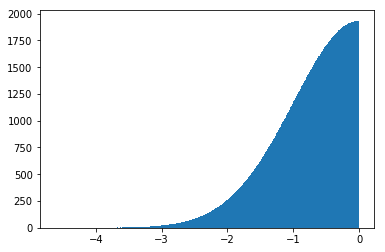

In [75]:
dsamp = one_samp/np.mean(one_samp) - 1.0
foo = hist(gaussianize(dsamp.ravel()), bins=500)
#xlim(-4.8, -4.4)

(-1.0, 7.2172627)


/home1/06147/pberger/.virtualenvs/pytorch_env/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


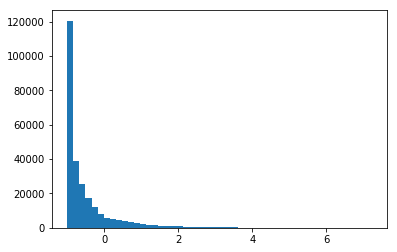

In [46]:
dsamp = one_samp/np.mean(one_samp) - 1.0
#foo = hist(loglike_transform(one_samp.ravel(), a=4.0), bins=500)
foo = hist(logplus(dsamp.ravel()), bins=50)
print(np.min(logplus(dsamp.ravel())), np.max(logplus(dsamp.ravel())))
#xlim(0, 100)

-13.862944
(-1.0, 1361.7539)
(-1.0, 7.2172627)


/home1/06147/pberger/.virtualenvs/pytorch_env/lib/python2.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


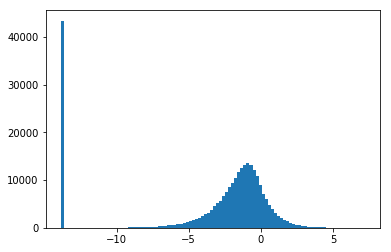

In [41]:
dsamp = one_samp/np.mean(one_samp) - 1.0
#foo = hist(loglike_transform(one_samp.ravel(), a=4.0), bins=500)
#foo = hist(logplus(dsamp.ravel()), bins=100)
print(np.min(np.log(1e-6+1.0+dsamp.ravel())))
foo = hist(np.log(1e-6+1.0+dsamp.ravel()), bins=100)
print(np.min(dsamp.ravel()), np.max(dsamp.ravel()))
print(np.min(logplus(dsamp.ravel())), np.max(logplus(dsamp.ravel())))
#xlim(0, 100)

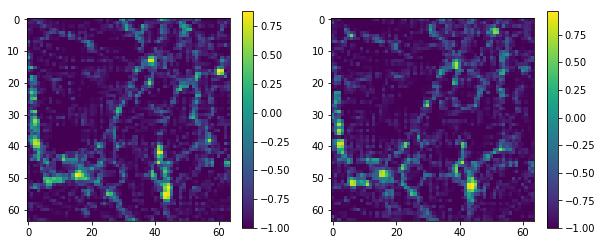

In [16]:
# look at some slices
one_samp = nbody.datasims[1]

fig = figure(figsize = (10, 4))

for i in range(2):
    subplot(1,2,1+i)
    imshow(loglike_transform(one_samp[i], a=4.0))
    colorbar()

In [76]:
## for i in np.arange(130, 149):
#     print('epoch ', i)
#     all_figs, fig_keys = summary_plots(nbody, tidk, i, nsamp=200, plot_gradnorm=True,scaled_voxel_pdf=True, unscaled_voxel_pdf=True, power_spec=True, indiv_pspec=True, ncond=1, c=[0.0])

# epochs = [133, 134, 139]
tlarger = '20200122-190235'
tlarger2 = '20200123-014200'
tlarger_z0 = '20200122-192131'
tlar = '20200123-120544'

epochs = np.arange(70, 100)
for i in epochs:
    all_figs, fig_keys = summary_plots(nbody, tlar, i, plot_gradnorm=True, nsamp=200, use_realdat=True, power_spec=True, ncond=1, c=[0.0, 1.0, 3.0])



('device:', device(type='cuda', index=0))
[8. 4. 2. 1.]


IOError: [Errno 13] Permission denied: '/work/06224/rfederst/maverick2//results/20200123-120544/params.txt'

In [ ]:
# plt.figure()
# plt.title('Voxel PDFs for nbody at different redshifts')
# for i in xrange(len(nbody.redshift_bins)):
#     vols = loglike_transform(np.array([v for j,v in enumerate(nbody.datasims) if nbody.zlist[j]==nbody.redshift_bins[i]]))
#     plt.hist(vols[:100].flatten(), bins=100, histtype='step', label='z='+str(nbody.redshift_bins[i]), normed=True)
    
# plt.legend()
# plt.yscale('log')
# plt.xlabel('Scaled value (a=4)')
# plt.show()

# cmap = plt.get_cmap('jet_r')


# plt.figure()
# for i in xrange(len(nbody.redshift_bins)):
#     vols = np.array([v for j,v in enumerate(nbody.datasims) if nbody.zlist[j]==nbody.redshift_bins[i]])

#     pk, kbins = nbody.compute_power_spectra(vols[:100])
    
#     color = cmap(float(i)/len(nbody.redshift_bins))

#     plt.fill_between(kbins, np.percentile(pk, 16, axis=0), np.percentile(pk, 84, axis=0), facecolor=color, alpha=0.3)
#     plt.plot(kbins, np.median(pk, axis=0), label='z='+str(nbody.redshift_bins[i]), color=color, marker='.')
        
# plt.xscale('log')
# plt.yscale('log')
# plt.legend()
# plt.xlabel('k')
# plt.ylabel('P(k)')
# plt.show()

In [6]:
# gen_model, pdict = nbody.restore_generator('20190510-141227', epoch=31)
# gen_model, pdict = nbody.restore_generator('20190423-012008') # good run of 64**3 z=0
# gen_model, pdict = nbody.restore_generator('20190510-012809', n_condparam=1) # redshift cGAN run 40 epochs + 20 previous
# gen_model, pdict = nbody.restore_generator('20190510-141338') # 4096/2048
# gen_model, pdict = nbody.restore_generator('20190511-143226', epoch=40) # 16384

# print(gen_model.state_dict().keys())

# layer1 = gen_model.state_dict()['main.6.weight']
# print(layer1.shape)
# fig = plt.figure(figsize=(6,12))
# for a, filt in enumerate(layer1[:32]):
#     filtarr = []
#     for i in xrange(4):
#         for j in xrange(4):
#             for k in xrange(4):
#                 filtarr.append([i,j,k,filt[0][i,j,k]])
#     filtarr = np.flip(np.array(filtarr), axis=0)

#     ax = fig.add_subplot(8, 4, a+1, projection='3d')
#     p = ax.scatter(filtarr[:,0], filtarr[:,1], filtarr[:,2], c=filtarr[:,3], alpha=0.7, marker='s', s=400)
# plt.tight_layout()
# plt.show()

In [ ]:
# real, imag, freqs = filter_powerspec(layer1)
# plot_filter_powerspec(real, imag, freqs)

In [ ]:
# nbody.plot_multi_z_vpdfs(gen_model, pdict, nsamp=5)

In [18]:
# zbins = np.linspace(10, 0, 64)
# print(nbody.redshift_bins)
# fixed_z = torch.randn(1, 201, 1, 1, 1).float()

# zslices = np.zeros((len(nbody.redshift_bins),64,64))
# for i in xrange(len(nbody.redshift_bins)):
# # for i in xrange(64):
# #     fixed_z[:,-1] = zbins[i]
#     fixed_z[:,-1] = nbody.redshift_bins[i]

#     gen_samp = gen_model_wgangp(fixed_z).detach().numpy()
#     zop = gen_samp[0][0,20]
#     zslices[i,:,:] = zop
    
# nbody.make_gif_slices(zslices, name='64x64x64_zslices_'+str(epoch), length=len(zslices))

# fig = plt.figure(figsize=(10,6))
# for i in xrange(len(nbody.redshift_bins)):
#     plt.subplot(2,5,i+1)
#     plt.title('z='+str(nbody.redshift_bins[i]))
#     plt.imshow(zslices[3][i])
#     plt.xticks([])
#     plt.yticks([])
# plt.tight_layout()
# plt.show()


# plt.figure(figsize=(10,6))
# real_slices = np.zeros((10,64,64))
# with h5py.File(nbody.data_path + nbody.name_base + str(2)+'_gridpart.h5', 'r') as ofile:
#     for i,idx in enumerate(nbody.redshift_bins):
#         print(idx, nbody.redshift_bins[i])
#         sim = ofile['%3.3d'%(10-idx)][()]
#         real_slices[i,:,:] = loglike_transform(sim[10,:64,:64], a=4.)
#         plt.subplot(2,5,i+1)
#         plt.imshow(real_slices[i,:,:])
# plt.tight_layout()
# plt.show()        

# make_gif_slices(real_slices, name='real_redshiftslices')

[10.    7.5   5.    3.    2.    1.5   1.    0.5   0.25  0.  ]
('Saving to ', 'figures/gif_dir/')


In [9]:
# find_best_epoch('20190602-204848', epochs=[40, 47, 49], nsamp=600)   
# find_best_epoch('20190806-223055', epochs=np.arange(0, 30), nsamp=50) # redshift 10 only
# find_best_epoch('20190807-090405', epochs=np.arange(30, 40), nsamp=50) # redshift 10, learning rate 1/4th of normal
# find_best_epoch('20190807-102234', epochs=np.arange(30, 40), nsamp=50) 
# find_best_epoch('20190807-102234', epochs=np.arange(30, 40), nsamp=50) 
# find_best_epoch('20190727-164234', epochs=np.arange(36, 40), nsamp=50)
# find_best_epoch('20190727-164024', epochs=[39], nsamp=400)
# find_best_epoch('20190728-001921', epochs=np.arange(39, 40), nsamp=100, k1=2.0, k2=2.0)
# find_best_epoch('20190729-033958', epochs=[49, 37, 41], nsamp=00, extra_conv_layers=2, k1=1.0, k2=0.5)
# find_best_epoch('20190728-001921', epochs=np.arange(15,24), nsamp=100)

In [7]:
# nbody.load_in_sims(2)
# realpks, realkbins = nbody.compute_power_spectra(np.array(nbody.datasims[-nsamp:]))

# print('a..')
# bka, thetaa = nbody.compute_matter_bispectrum(inverse_loglike_transform(aa[:200]), k1=k1, k2=k2)
# print('b..')
# bkb, thetab = nbody.compute_matter_bispectrum(inverse_loglike_transform(ba[:200]), k1=k1, k2=k2)
# print('c..')
# bkc, thetac = nbody.compute_matter_bispectrum(inverse_loglike_transform(ca[:200]), k1=k1, k2=k2)

# pka, kbinsa = nbody.compute_power_spectra(aa, inverse_loglike_a=4.0)
# pkb, kbinsb = nbody.compute_power_spectra(ba, inverse_loglike_a=4.0)
# pkc, kbinsc = nbody.compute_power_spectra(ca, inverse_loglike_a=4.0)
# nbody.plot_powerspectra(genpks=[pka, pkb, pkc], genkbins=[kbinsa, kbinsb, kbinsc], labels=['a', 'b', 'c'])

# x = nbody.plot_bispectra(k1, k2, genbks=[bka, bkb, bkc], thetabins=[thetaa, thetab, thetac], labels=['a', 'b', 'c'])

In [8]:
# timestr = '20190730-024129' # omega m / s8 grid
# epoch = 35
# nbody = nbody_dataset(cubedim=128)
# nbody.load_in_sims(2)
# nsamp = 50
# ncond=2
# k1 = 0.2
# k2 = 0.3
# device = torch.device("cuda:0")
# gen, pdict = nbody.restore_generator(timestr, epoch=epoch, n_condparam=ncond)

# print(pdict.lcdm)


# cs = [[-1.0, 0.0]]
    
# gen_samps = nbody.get_samples(gen, nsamp, pdict, n_conditional=ncond, c=[-1.0, 0.0])
# gen_samps2 = nbody.get_samples(gen, nsamp, pdict, n_conditional=ncond, c=[0.0, 0.0])
# gen_samps3 = nbody.get_samples(gen, nsamp, pdict, n_conditional=ncond, c=[1.0, 0.0])

# genpk, genkbin = nbody.compute_power_spectra(gen_samps, inverse_loglike_a=4.0)
# genpk2, genkbin2 = nbody.compute_power_spectra(gen_samps2, inverse_loglike_a=4.0)
# genpk3, genkbin3 = nbody.compute_power_spectra(gen_samps3, inverse_loglike_a=4.0)

# nbody.plot_powerspectra(genpks=[genpk, genpk2, genpk3], genkbins=[genkbin, genkbin2, genkbin3], labels=['-1', '0', '1'])




In [10]:

# if pdict['piecewise_scaling']:
#     plot_voxel_pdf_2(gen_vols=gen_samps, real_vols = piecewise_transform(np.array(nbody.datasims[:nsamp]), a=logl_a, c=pdict['c'], xmax=pdict['xmax']))
#     pk, kbin = nbody.compute_power_spectra(inverse_piecewise_transform(gen_samps, a=logl_a, c=pdict['c'], xmax=pdict['xmax']), unsqueeze=True)
#     bks, thetas = nbody.compute_matter_bispectrum(inverse_piecewise_transform(gen_samps[:,0,:,:,:], a=logl_a, c=pdict['c'], xmax=pdict['xmax']), k1=k1, k2=k2)

# elif pdict['log_scaling']:
#     plot_voxel_pdf_2(gen_vols=gen_samps, real_vols=log_transform_HI(np.array(nbody.datasims[:nsamp])))
#     pk, kbin = nbody.compute_power_spectra(inverse_log_transform_HI(gen_samps), unsqueeze=True)
#     bks, thetas = nbody.compute_matter_bispectrum(inverse_log_transform_HI(gen_samps[:,0,:,:,:]), k1=k1, k2=k2)


In [11]:
# with open('power_spectra_gadget2_128.pkl', 'r') as f:
#     pks = np.array(pickle.load(f))
    
# with open('powerspectra_kbins_gadget2_128.pkl', 'r') as f:
#     kbins = np.array(pickle.load(f))
    
# with open('npoint_stats/power_spectra_gadget2.pkl', 'r') as f:
#     pks = np.array(pickle.load(f))
    
# with open('power_spectra_gadget2_128_z=2.pkl', 'r') as f:
#     pks = np.array(pickle.load(f))
    
# with open('npoint_stats/powerspectra_kbins_gadget2.pkl', 'r') as f:
#     kbins = np.array(pickle.load(f))

# with open('npoint_stats/bispectra_gadget2_k1='+str(k1)+'_k2='+str(k2)+'.pkl', 'r') as f:
#     bks = np.array(pickle.load(f))
    
# with open('npoint_stats/bispectra_thetas.pkl', 'r') as f:
#     thetas = pickle.load(f)

1
royalblue
GAN


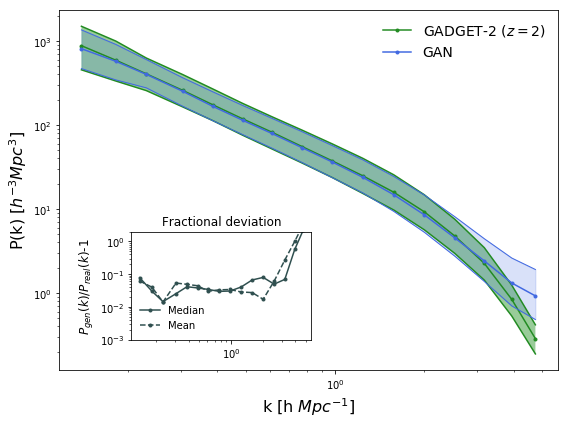

In [24]:
f_powerspectra = plot_powerspectra(realpk=pks, realkbins=kbins, genpks=genpk_list, genkbins=genk_list, mode='median',frac=True,labels=labels, reallabel='GADGET-2 ($z=2$)', colors=['royalblue'])
# f_powerspectra.savefig('figures/powerspec_z2_a4.pdf', bbox_inches='tight')

('device:', device(type='cuda', index=0))
[8. 4. 2. 1.]
('device:', device(type='cuda', index=0))
[8. 4. 2. 1.]


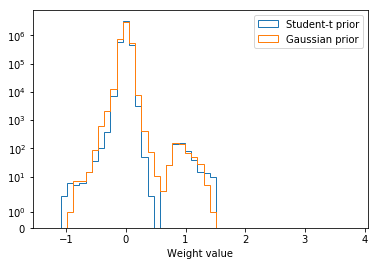

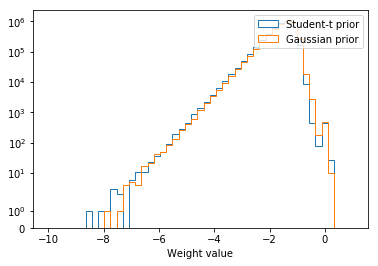

In [101]:
gen_student_t, pdict = nbody.restore_generator(timestr_100_df10_a45, epoch=143, n_condparam=0, discriminator=False, extra_conv_layers=0)
# gen_gaussian, pdict = nbody.restore_generator(t_z2_a4, epoch=90, n_condparam=ncond, discriminator=False, extra_conv_layers=0)


gen_gaussian, pdict = nbody.restore_generator(t_z_p5_p25_0_a10_sep12, epoch=41, n_condparam=ncond, discriminator=False, extra_conv_layers=0)

p_student_t = []
p_gaussian = []

for p in gen_student_t.parameters():
    p_student_t.extend(p.detach().cpu().numpy().ravel())
    
for p in gen_gaussian.parameters():
    p_gaussian.extend(p.detach().cpu().numpy().ravel())

plt.figure()
plt.hist(np.log10(np.abs(p_student_t)), bins = np.linspace(-10, 1, 50), histtype='step', label='Student-t prior')
plt.hist(np.log10(np.abs(p_gaussian)), bins = np.linspace(-10, 1, 50), histtype='step', label='Gaussian prior')
plt.legend()
plt.yscale('symlog')
plt.xlabel('Weight value')
# plt.savefig('figures/weight_histogram_student_t_gaussian.png', bbox_inches='tight')
plt.show()


# print(sum(p.numel() for p in gen.parameters() if p.requires_grad))
# for parameter in gen.parameters():
#     print(parameter)
# print(len(gen.parameters()))


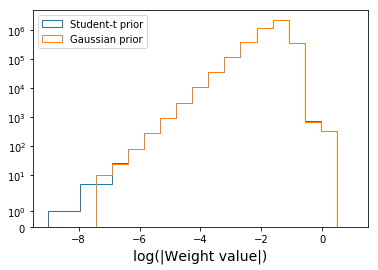

In [93]:
plt.figure()
plt.hist(np.log10(np.abs(p_student_t)), bins = np.linspace(-9, 1, 20), histtype='step', label='Student-t prior')
plt.hist(np.log10(np.abs(p_gaussian)), bins = np.linspace(-9, 1, 20), histtype='step', label='Gaussian prior')
plt.legend(loc=2)
plt.yscale('symlog')
plt.xlabel('log(|Weight value|)', fontsize=14)
plt.savefig('figures/absolute_weight_histogram_student_t_gaussian.png', bbox_inches='tight')
plt.show()

('device:', device(type='cuda', index=0))
[8. 4. 2. 1.]


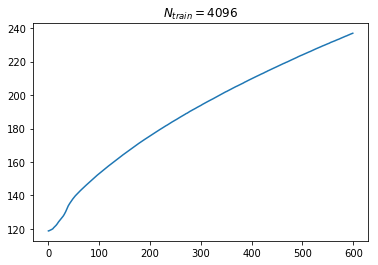

('device:', device(type='cuda', index=0))
[8. 4. 2. 1.]


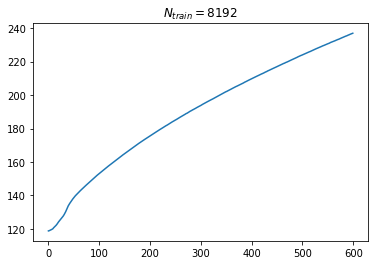

('device:', device(type='cuda', index=0))
[8. 4. 2. 1.]


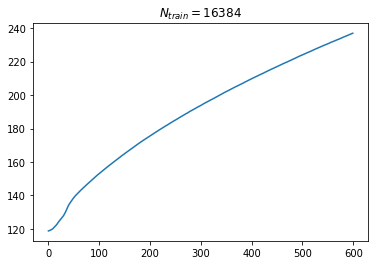

('device:', device(type='cuda', index=0))
[8. 4. 2. 1.]


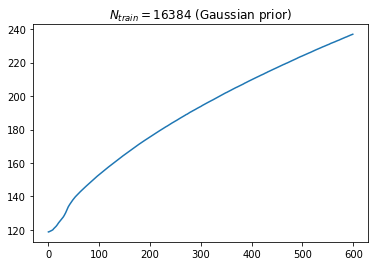

In [59]:
norm_list = []

timestr_list_ns = [timestr_df10_8, timestr_df10_16, timestr_100_df10_a45, '20191226-165322'] 

labels = ['$N_{train}=4096$', '$N_{train}=8192$', '$N_{train}=16384$', '$N_{train}=16384$ (Gaussian prior)']

for i, timestr in enumerate(timestr_list_ns):
    norm_list.append(weight_norm_vs_epoch(timestr))


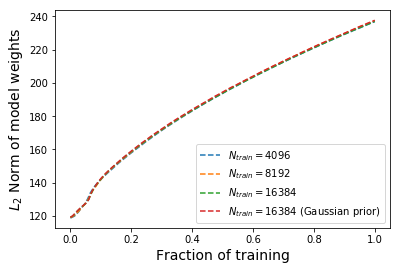

In [67]:
plt.figure()
for i, timestr in enumerate(timestr_list_ns):

    plt.plot(np.linspace(0, 1, len(norm_list[i])), norm_list[i], label=labels[i], linestyle='dashed')
    plt.legend()
plt.ylabel('$L_2$ Norm of model weights', fontsize=14)
plt.xlabel('Fraction of training', fontsize=14)
# plt.savefig('figures/weight_norm_different_models.png', bbox_inches='tight')
plt.show()

In [25]:
bins = 10**(np.linspace(-4, 4, 50))
midbins = 0.5*(bins[1:]+bins[:-1])

logbins = np.linspace(-4, 4, 50)  
midlogbins = 0.5*(logbins[1:]+logbins[:-1])
real_vols = np.array(nbody.datasims[:500])        
            
voxel_hists = np.array([np.histogram(np.log10(real_vols[i]), bins=logbins, density=True)[0] for i in range(real_vols.shape[0])])
mean_voxel_hist = np.average(voxel_hists, axis=0)

gen_voxel_hists = np.array([np.histogram(np.log10(inverse_loglike_transform(gen_samps[i], a=logl_a)), bins=logbins, density=True)[0] for i in range(real_vols.shape[0])])
mean_gen_voxel_hist = np.average(gen_voxel_hists, axis=0)

# print(voxel_hists.shape, mean_voxel_hist.shape)

/opt/apps/intel18/python2/2.7.16/lib/python2.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


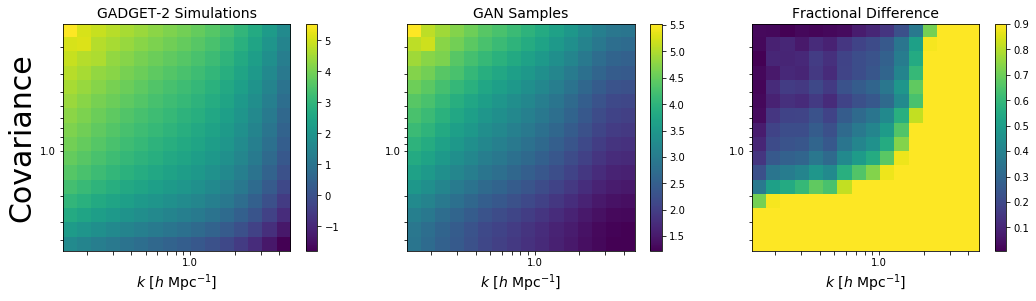

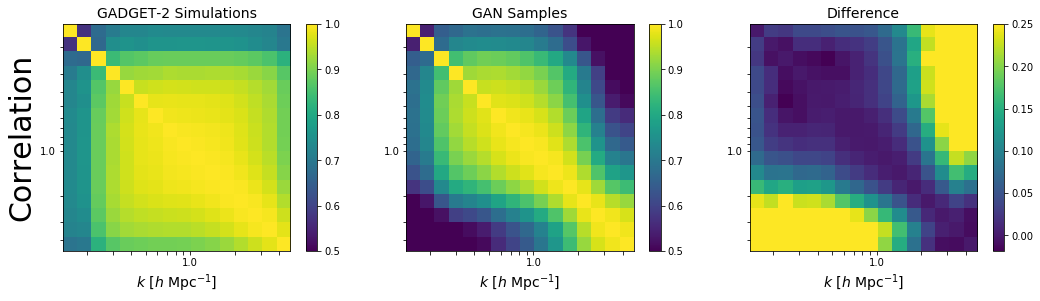

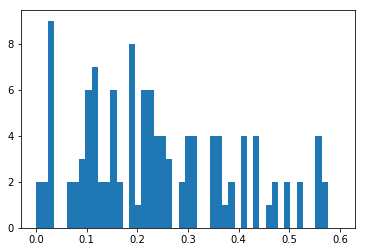

In [27]:
# corr_gen = np.corrcoef(pkz_gen.transpose())

# cov_gen = np.cov(pkz_gen.transpose())
# cov_real = np.cov(pkz.transpose())

fcov = plot_corr_cov_matrices(cov_real, cov_gen, mode='cov', vmax=0.9, kbins=kbinz)
fcorr = plot_corr_cov_matrices(corr_real, corr_gen, mode='corr', vmax=0.25, kbins=kbinz)

plt.figure()
plt.hist(np.abs(cov_real.ravel()-cov_gen.ravel())/cov_real.ravel(), bins=np.linspace(0, 0.6, 50))
plt.show()

# fcov.savefig('figures/cov_df10_a45_epoch_1195_2048_2048.pdf', bbox_inches='tight')
# fcorr.savefig('figures/corr_df10_a45_epoch_143_1000_whole_2.pdf', bbox_inches='tight')

In [37]:
# fcov.savefig('figures/cov_df10_a45_epoch_1195_2048.pdf', bbox_inches='tight')

In [ ]:
from scipy.stats import norm
import matplotlib.mlab as mlab

max_vals = []
max_vals_gen = []
for j in range(nsamp):
#     print(np.max(gen_samps[j]))
    max_vals_gen.append(np.max(gen_samps[j]))

# print(max_vals_gen)
for j in range(realdat.shape[0]):
    max_vals.append(loglike_transform(np.max(realdat[j]), a=45))
# pks, kbins = nbody.compute_power_spectra(loglike_transform(realdat, a=logl_a))

plt.figure()
_, bins, _ = plt.hist(max_vals, bins=30, label='GADGET', density=True, histtype='step')
plt.hist(max_vals_gen, bins=bins, label='GAN', histtype='step', density=True)
plt.legend()
plt.show()

# for i in np.arange(1, pks.shape[1]-1):

#     (mu, sigma) = norm.fit(pks[:,i])
#     print(i)
#     plt.figure()
#     _, bins, _ = plt.hist(pks[:,i], bins=30, density=True)
#     y = mlab.normpdf( bins, mu, sigma)
#     l = plt.plot(bins, y, 'r--', linewidth=2)
#     # plt.hist(np.random.normal(3.4, 0.4, 10000), density=True, bins=bins, histtype='step')
#     # plt.xscale('log')
#     plt.yscale('log')
#     plt.show()

In [5]:
real_pks = []
# real_bks = []
nsims = 32
k1 = 1.0
k2 = 2.0
cubedim = 64
for i in range(nsims):
    nbody = nbody_dataset(cubedim=cubedim)
    nbody.load_in_sims(1, idxs=[i], redshift_idxs=[4])
    pks, kbins = compute_power_spectra(np.array(nbody.datasims), cubedim=cubedim)
#     bks, thetas = compute_matter_bispectrum(np.array(nbody.datasims), k1=k1, k2=k2)
    
    real_pks.extend(pks)
#     real_bks.extend(bks)
    
# with open('powerspectra_kbins_gadget2_z=2.pkl', 'wb') as f:
#     pickle.dump(kbins, f)
    
# print('real_bks has length', len(real_bks))
with open('npoint_stats/power_spectra_gadget2_z=2.0.pkl', 'wb') as f:
    pickle.dump(real_pks, f)

# with open('bispectra_gadget2_k1=1.0_k2=2.0.pkl', 'wb') as f:
#     pickle.dump(real_bks, f)
    
# with open('bispectra_thetas.pkl', 'wb') as f:
#     pickle.dump(thetas, f)

    
    

(4, 2.0)


/home1/06224/rfederst/.local/lib/python2.7/site-packages/powerbox/tools.py:146: RuntimeWarning: invalid value encountered in divide
  bins = np.bincount(indx, weights=(weights * coords).flatten(), minlength=len(bins)+1)[1:-1] / binweight
/home1/06224/rfederst/.local/lib/python2.7/site-packages/powerbox/tools.py:106: UserWarning: One or more radial bins had no cells within it.
  warnings.warn("One or more radial bins had no cells within it.")
/home1/06224/rfederst/.local/lib/python2.7/site-packages/powerbox/tools.py:160: RuntimeWarning: invalid value encountered in divide
  rl = np.bincount(indx, weights=np.real(field.flatten()), minlength=len(sumweights)+2)[1:-1] / sumweights


(4, 2.0)
(4, 2.0)
(4, 2.0)
(4, 2.0)
(4, 2.0)
(4, 2.0)
(4, 2.0)
(4, 2.0)
(4, 2.0)
(4, 2.0)
(4, 2.0)
(4, 2.0)
(4, 2.0)
(4, 2.0)
(4, 2.0)
(4, 2.0)
(4, 2.0)
(4, 2.0)
(4, 2.0)
(4, 2.0)
(4, 2.0)
(4, 2.0)
(4, 2.0)
(4, 2.0)
(4, 2.0)
(4, 2.0)
(4, 2.0)
(4, 2.0)
(4, 2.0)
(4, 2.0)
(4, 2.0)


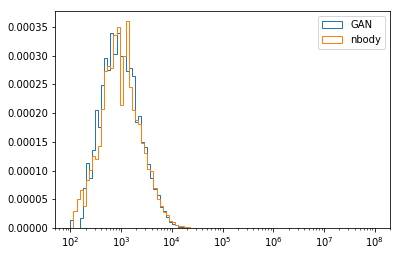

In [43]:
# gen, pdict = nbody.restore_generator(timestr_50_0p3, epoch=103, n_condparam=ncond, discriminator=False)
# nbatch = 100
# ncond = 0
# all_pks = []
# for i in xrange(50):
#     print('i='+str(i))
#     gen_samps = nbody.get_samples(gen, nbatch, pdict, n_conditional=ncond, discriminator=None)
#     logl_a = pdict['loglike_a']
#     pks, kbin = nbody.compute_power_spectra(gen_samps, inverse_loglike_a=logl_a, unsqueeze=True)
#     for pk in pks:
#         all_pks.append(pk)
        
        
# all_pks = np.array(all_pks)
logbins = 10**(np.linspace(2, 8, 100))
# print(all_pks[:,3])
  
realdat = np.array(nbody.datasims[:2000])
all_real_pks, kbins = nbody.compute_power_spectra(realdat)
all_real_pks = np.array(all_real_pks)
               
plt.figure()
plt.hist(all_pks[:,3], bins=logbins, label='GAN', histtype='step', density=True)
plt.hist(all_real_pks[:,3], bins=logbins, label='nbody', histtype='step', density=True)
plt.xscale('log')
plt.legend()
plt.show()


[       nan 0.13884009 0.18131763 0.23000178 0.30481606 0.38605192
 0.48615925 0.61070214 0.77257637 0.9765723  1.23811602 1.57456071
 1.99765158 2.53198742 3.18545461 3.94426322 4.73950071        nan
        nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan]


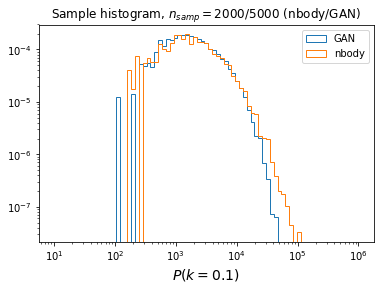

In [51]:
logbins = 10**(np.linspace(1, 6, 80))
print kbin
plt.figure()
plt.hist(all_pks[:,1], bins=logbins, label='GAN', histtype='step', density=True)
plt.hist(all_real_pks[:,1], bins=logbins, label='nbody', histtype='step', density=True)
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.xlabel('$P(k=0.1)$', fontsize=14)
plt.title('Sample histogram, $n_{samp}=2000/5000$ (nbody/GAN)')
plt.show()


In [4]:
# gen_model_wgangp, pdict_wgangp = nbody.restore_generator(timestr, epoch=39, n_condparam=ncond)
# fixed_z = torch.randn(1, 200+ncond, 1, 1, 1).float()
# redshifts = [3.0, 2.0, 1.5, 1.0, 0.5, 0.25, 0.0]
# gen_samps = []
# for zed in redshifts:
#     fixed_z[:,-1] = zed

# gen_samp = gen_model_wgangp(fixed_z).detach().numpy()
# gen_samps.append(gen_samp)

# gen_samps = nbody.get_samples(gen_model_wgangp, 100, pdict_wgangp, n_conditional=ncond)
# gen_model_wgangp, pdict_wgangp = nbody.restore_generator(timestr, epoch=392, n_condparam=ncond)
# gen_model, pdict = nbody.restore_generator(timestr, epoch=epoch, n_condparam=ncond)
# nbody.datasims = np.array(nbody.datasims)


# genpks, genks, realpks, realks = nbody.compare_pk_diffz(gen_model_wgangp, pdict_wgangp, [3, 4, 5, 6, 7, 8, 9], nsamp=100, timestr=None)
# gen_samps = nbody.get_samples(gen_model, nsamp, pdict, n_conditional=ncond)
# gen_samps[gen_samps>np.percentile(gen_samps, 99.9995)] *= 0.5

# gen_samps_wgangp = nbody.get_samples(gen_model_wgangp, nsamp, pdict_wgangp, n_conditional=ncond, c=0.)
# gen_samps_wgangp[gen_samps_wgangp>np.percentile(gen_samps_wgangp, 99.9995)] *= 0.5

# # nbody.plot_multi_z_vpdfs(gen_model_wgangp, pdict_wgangp, zs=[3.0, 2.0, 1.5, 1.0, 0.5, 0.25, 0.0], timestr=timestr, nsamp=100, epoch=epoch)
# # nbody.plot_multi_z_vpdfs(zs=[3.0, 2.0, 1.5, 1.0, 0.5, 0.25, 0.0], timestr=timestr, nsamp=100, epoch=epoch)

# nbody.make_gif_slices(gen_samps[0][0], name='64x64x64_epoch_'+str(epochs[0]), timestr=timestr, length=64)
# # nbody.make_zslice_gif(gen_model_wgangp, timestr, epoch, zs=np.linspace(3.0, 0, 30), fps=5)


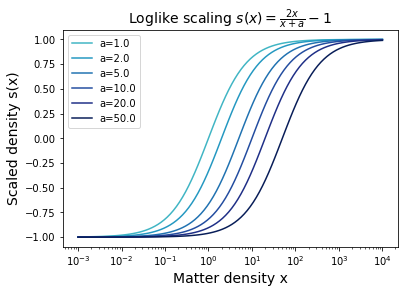

In [62]:
# lin = 10**(np.linspace(-3, 4, 100))
# f = plot_data_scalings(mode='loglike', a_range=[1., 2., 5., 10., 20., 50.], lin=lin)
# f.savefig('figures/data_scalings.pdf', bbox_inches='tight')

In [4]:
# 41, 46 (not as good)

# timestr = '20190514-003831' # redshift five bins
# timestr = '20190517-130537' # 10 sims wgan_gp five redshift bins
# timestr = '20190518-053301' # 20 sims wgan_gp five redshift bins
# timestr = '20190519-193804' # 16 sims wgan_gp four redshift bins 1 0.5 0.25 0
# timestr = '20190519-193712' # 8 sims wgan_gp four redshift bins 1 0.5 0.25 0
# timestr = '20190520-122526' # 12 sims four redshift bins 1 0.5 0.25 0
# timestr = '20190520-140438'
# timestr = '20190520-150454' # 12 sims four redshift bins 3 1.5 0.5 0
# timestr = '20190521-053341' # 8 sims four redshift bins 3 1.5 0.5 0
# timestr = '20190728-161328' # 12 sims four redshift bins transform to ages
timestr = '20190727-164024'

nbody = nbody_dataset(cubedim=64)
nbody.load_in_sims(2)
nsamp = 200
ncond=0
k1 = 0.2
k2 = 0.3
epoch = 39


gen_model, pdict = nbody.restore_generator(timestr, epoch=epoch, n_condparam=ncond)
print(pdict)
sizes = np.array([8., 4., 2., 1.])
device = torch.device("cuda:0")

opt_disc_model = DC_Discriminator3D(pdict['ngpu'], 1, pdict['ndf'], sizes, device, n_cond_features=ncond).to(device)
opt_disc_model.load_state_dict(torch.load('/work/06224/rfederst/maverick2/results/'+timestr+'/netD_optimal_epoch_2', map_location=device))
opt_disc_model.eval()


# fixed_z = torch.randn(1, 200+ncond, 1, 1, 1).float()
redshifts = [3.0, 2.0, 1.5, 1.0, 0.5, 0.25, 0.0]

# nbody.plot_multi_z_vpdfs(gen_model, pdict, zs=[3.0, 2.0, 1.5, 1.0, 0.5, 0.25, 0.0], timestr=timestr, nsamp=100, age=True, epoch=epoch)

# genpks, genks, realpks, realks = nbody.compare_pk_diffz(gen_model, pdict, [3, 4, 5, 6, 7, 8, 9], nsamp=100, timestr=None, age=True)

# print(pdict_wgangp)
# gen_samps = nbody.get_samples(gen_model, nsamp, pdict, n_conditional=ncond, c=0.0)
# gen_samps[gen_samps>np.percentile(gen_samps, 99.9995)] *= 0.5

# nbody.plot_multi_z_vpdfs(gen_model_wgangp, pdict_wgangp, zs=[3.0, 2.0, 1.5, 1.0, 0.5, 0.25, 0.0], timestr=timestr, nsamp=100, epoch=epoch)
# nbody.plot_multi_z_vpdfs(zs=[3.0, 2.0, 1.5, 1.0, 0.5, 0.25, 0.0], timestr=timestr, nsamp=100, epoch=epoch)


('device:', device(type='cuda', index=0))
[8. 4. 2. 1.]


RuntimeError: Error(s) in loading state_dict for DC_Generator3D:
	Missing key(s) in state_dict: "main.13.running_var", "main.13.bias", "main.13.weight", "main.13.running_mean", "main.15.weight", "main.16.running_var", "main.16.bias", "main.16.weight", "main.16.running_mean", "main.18.weight". 
	size mismatch for main.12.weight: copying a param with shape torch.Size([32, 1, 4, 4, 4]) from checkpoint, the shape in current model is torch.Size([32, 32, 4, 4, 4]).

Estimating D_M*...
output1shape: (32, 32, 32)
('n + 8', 'n=8')
('n + 7', 'n=15')
('n + 4', 'n=19')
('n + 4', 'n=23')
('n + 5', 'n=28')
('n + 12', 'n=40')
('n + 8', 'n=48')
('n + 1', 'n=49')
('n + 4', 'n=53')
('n + 7', 'n=60')
('n + 5', 'n=65')
('n + 2', 'n=67')
('n + 1', 'n=68')
('n + 10', 'n=78')
('n + 5', 'n=83')
('n + 9', 'n=92')
('n + 7', 'n=99')
('n + 5', 'n=104')
('n + 10', 'n=114')
('n + 7', 'n=121')
('n + 7', 'n=128')
('n + 1', 'n=129')
('n + 9', 'n=138')
('n + 5', 'n=143')
('n + 10', 'n=153')
('n + 4', 'n=157')
('n + 4', 'n=161')
('n + 7', 'n=168')
('n + 4', 'n=172')
('n + 4', 'n=176')
('n + 10', 'n=186')
('n + 7', 'n=193')
('n + 5', 'n=198')
('n + 5', 'n=203')
(200, 1, 64, 64, 64)
computing bispectrum..
computing power spectrum


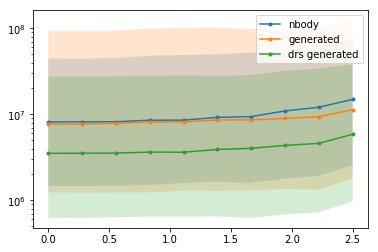

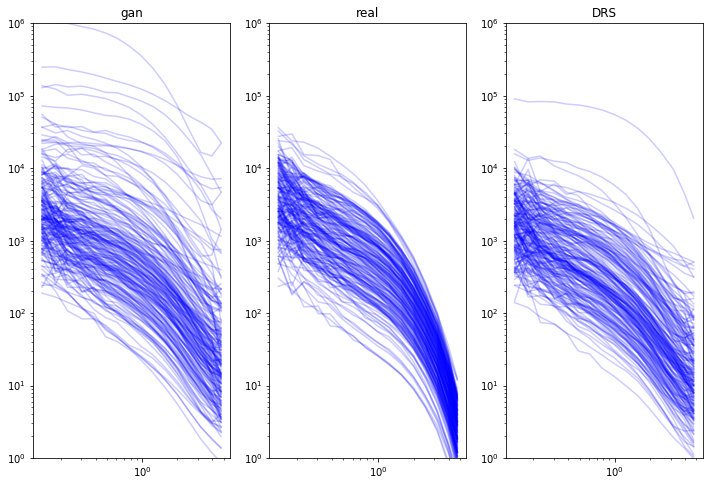

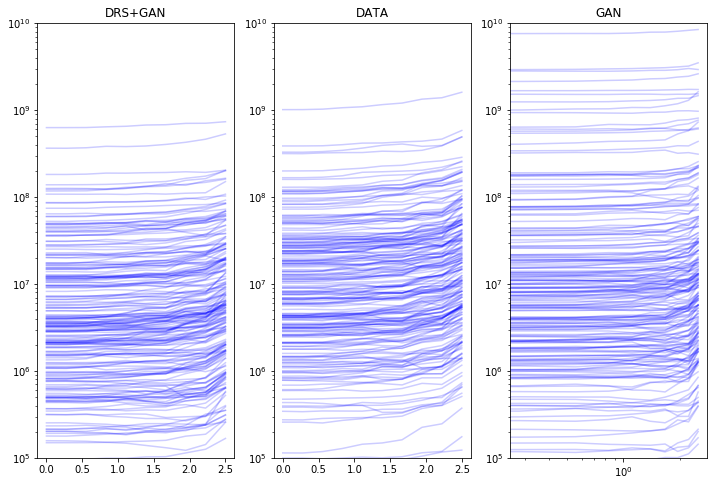

In [38]:
# find_best_epoch('20190727-164024', epochs=[39], nsamp=200)

drs_gen_samps = nbody.discriminator_rejection_sampling(gen_model, opt_disc_model, pdict, dmstar_n_samp=500, n_samp=200, n_conditional=0, gamma=0.0, batch_size=128, eps=0.01)
# print(drs_gen_samps.shape)
nsamp = 200
# gen_samps = nbody.get_samples(gen_model, nsamp, pdict, n_conditional=ncond)
print(gen_samps.shape)
# drs_gen_samps[drs_gen_samps>np.percentile(drs_gen_samps, 99.9995)] *= 0.9
# loglike_a = 3.0
print('computing bispectrum..')
with HiddenPrints():
#     genbks, thetas = nbody.compute_matter_bispectrum(inverse_loglike_transform(gen_samps[:,0,:,:,:], loglike_a), k1=k1, k2=k2)
    drs_bks, thetas = nbody.compute_matter_bispectrum(inverse_loglike_transform(np.array(drs_gen_samps)[:,0,:,:,:], loglike_a), k1=k1, k2=k2)
#     bks, thetas = nbody.compute_matter_bispectrum(np.array(nbody.datasims[-nsamp:]), k1=k1, k2=k2)

print('computing power spectrum')
# drs_bks, thetas = nbody.compute_matter_bispectrum(np.array(drs_gen_samps)[:,0,:,:,:])
drs_pks, drs_kbins = nbody.compute_power_spectra(np.array(drs_gen_samps), inverse_loglike_a=loglike_a, unsqueeze=True)
# genpks, kbins = nbody.compute_power_spectra(inverse_loglike_transform(gen_samps, loglike_a), unsqueeze=True)
# pks, kbins = nbody.compute_power_spectra(np.array(nbody.datasims[-nsamp:]))


plt.figure()
plt.plot(thetas, np.median(bks, axis=0), marker='.', label='nbody')
plt.fill_between(thetas, np.percentile(bks, 16, axis=0), np.percentile(bks, 84, axis=0), alpha=0.2)
plt.plot(thetas, np.median(genbks, axis=0), marker='.', label='generated')
plt.fill_between(thetas, np.percentile(genbks, 16, axis=0), np.percentile(genbks, 84, axis=0), alpha=0.2)
plt.plot(thetas, np.median(drs_bks, axis=0), marker='.', label='drs generated')
plt.fill_between(thetas, np.percentile(drs_bks, 16, axis=0), np.percentile(drs_bks, 84, axis=0), alpha=0.2)
plt.legend()
plt.yscale('log')
plt.show()

from matplotlib.colors import Normalize
# norm = Normalize(vmin=np.min(np.array(disc_outs)), vmax=np.max(np.array(disc_outs)))

plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.title('gan')
for i, genpk in enumerate(genpks):
    plt.plot(kbins, genpk, c='b', alpha=0.2)
# for i, genpk in enumerate(genpk_list[0]):
#     plt.plot(genk_list[0], genpk, color=cm.plasma(norm(disc_outs[i])), label=str(disc_outs[i]))
# plt.legend()
plt.xscale('log')
plt.ylim(1,1e6)
plt.yscale('log')


plt.subplot(1,3,2)
plt.title('real')
for i, pk in enumerate(pks):
    plt.plot(kbins, pk, alpha=0.2, c='b')
plt.xscale('log')
plt.ylim(1, 1e6)
plt.yscale('log')
# plt.colorbar()
# plt.legend()
# plt.show()

plt.subplot(1,3,3)
plt.title('DRS')
for i, pk in enumerate(drs_pks):
    plt.plot(drs_kbins, drs_pks[i], c='b', alpha=0.2)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1, 1e6)
plt.show()


plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.title('DRS+GAN')
for i, bk in enumerate(drs_bks):
    plt.plot(thetas, bk, c='b', alpha=0.2)
plt.ylim(1e5,1e10)
plt.yscale('log')

plt.subplot(1,3,2)
plt.title('DATA')
for i, bk in enumerate(bks):
    plt.plot(thetas, bk, c='b', alpha=0.2)
plt.ylim(1e5,1e10)
plt.yscale('log')

plt.subplot(1,3,3)
plt.title('GAN')
for i, bk in enumerate(genbks):
    plt.plot(thetas, bk, c='b', alpha=0.2)
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e5,1e10)
plt.show()




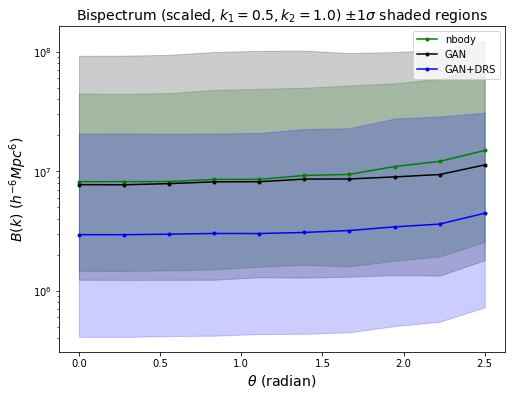

In [36]:
plt.figure(figsize=(8,6))
plt.title('Bispectrum (scaled, $k_1=0.5, k_2=1.0$) $\pm 1\\sigma$ shaded regions', fontsize=14)
plt.plot(thetas, np.median(bks, axis=0), marker='.', label='nbody', color='g')
plt.fill_between(thetas, np.percentile(bks, 16, axis=0), np.percentile(bks, 84, axis=0), alpha=0.2, color='g')
plt.plot(thetas, np.median(genbks, axis=0), marker='.', label='GAN', color='k')
plt.fill_between(thetas, np.percentile(genbks, 16, axis=0), np.percentile(genbks, 84, axis=0), alpha=0.2, color='k')
plt.plot(thetas, np.median(drs_bks, axis=0), marker='.', label='GAN+DRS', color='b')
plt.fill_between(thetas, np.percentile(drs_bks, 16, axis=0), np.percentile(drs_bks, 84, axis=0), alpha=0.2, color='b')
plt.legend()
plt.xlabel('$\\theta$ (radian)', fontsize=14)
plt.ylabel('$B(k)$ $(h^{-6}Mpc^6)$', fontsize=14)
plt.yscale('log')
plt.show()

2
darkslategrey
gan
royalblue
gan+drs


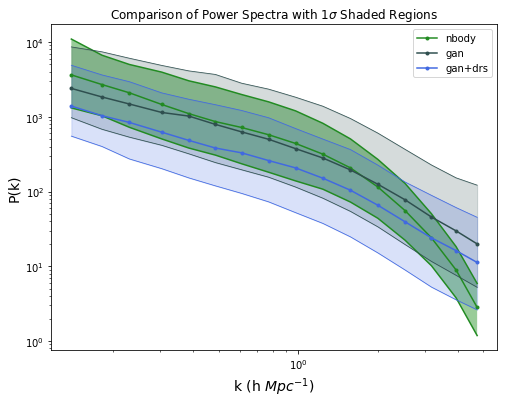

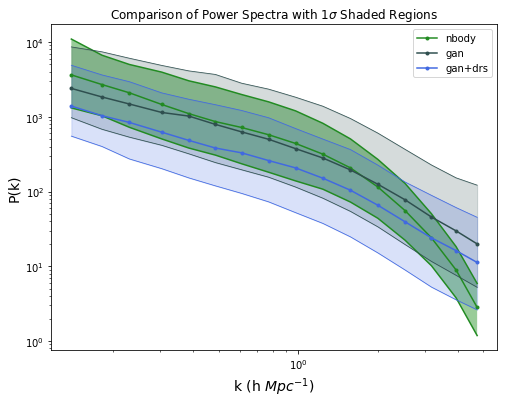

In [37]:
# print(len(genpk_list), len(drs_pks))
# print(len(genk_list), len(drs_kbins))
# genk_list.append(drs_kbins)
# genpk_list.append(drs_pks)
labels=['gan', 'gan+drs']
# f = nbody.plot_powerspectra(realpk=pks, realkbins=kbins, genpks=genpk_list[:2], genkbins=genk_list[:2], labels=['GAN', 'GAN+DRS', 'nbody'])
nbody.plot_powerspectra(realpk=pks, realkbins=kbins, genpks=[genpks, drs_pks], genkbins=[kbins, drs_kbins], labels=labels)


In [ ]:
pks, kbins = nbody.compute_power_spectra(np.array(nbody.datasims[:100]))
genpks, kbinsg = nbody.compute_power_spectra(gen_samps, inverse_loglike_a=4.)
nbody.plot_powerspectra(realpk=pks, realkbins=kbins, genpk=genpks, genkbins=kbinsg)

nbody.plot_voxel_pdf(real_vols=np.array(nbody.datasims[:100]))
nbody.plot_voxel_pdf(gen_vols=gen_samps, real_vols=loglike_transform(np.array(nbody.datasims[:100])))

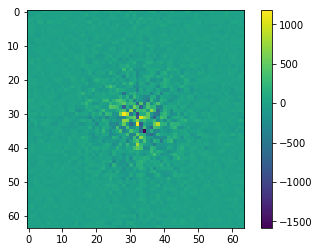

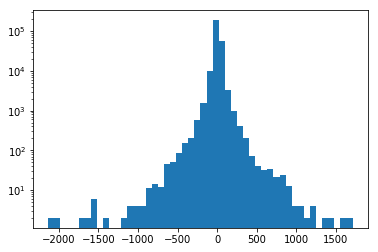

In [35]:
fft = np.fft.fftn(loglike_transform(gsamp), axes=(0,1,2))
fft = np.fft.fftshift(fft).real
fft[np.abs(fft)>1e5] = 0
# print(fft.shape)
plt.figure()
plt.imshow(fft.real[30])
plt.colorbar()
plt.show()


plt.figure()
plt.hist(fft.real.ravel(), bins=50)
plt.yscale('log')
plt.show()

261702


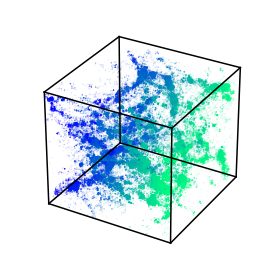

In [149]:
npoints = 300000
plotpts = []
# print(gen_samps.shape)

logl_a = 50.


pt1 = [0,0,0]
pt2 = [0,0,64]
pt3 = [0,64,0]
pt4 = [0,64,64]
pt5 = [64,0,0]
pt6 = [64,0,64]
pt7 = [64,64,0]
pt8 = [64,64,64]

pairs = np.array([np.array([pt1, pt2]), np.array([pt1, pt3]), np.array([pt1, pt5]), np.array([pt4, pt2]), \
        np.array([pt4, pt3]), np.array([pt8, pt7]), np.array([pt6, pt8]), \
        np.array([pt6, pt5]), np.array([pt7, pt5]), np.array([pt8, pt4]), np.array([pt3, pt7]), \
        np.array([pt6, pt2])])

real = loglike_transform(nbody.datasims[29], a=logl_a)

# print(gen_samps[0].shape)

for n in xrange(npoints):
    xyz = np.random.randint(0, 63, size=3)
    plotpts.append([xyz[0], xyz[1], xyz[2], real[xyz[0],xyz[1],xyz[2]]])
#     plotpts.append([xyz[0], xyz[1], xyz[2], gen_samps[9,0,xyz[0],xyz[1],xyz[2]]])
#     plotpts.append([xyz[0], xyz[1], xyz[2], gen_samps[10,0,xyz[0],xyz[1],xyz[2]]])

    
# plotpts = np.array(plotpts)

plotpts = np.array(plotpts)
print(len(plotpts[plotpts[:,3]<-0.95]))
plotpts = plotpts[plotpts[:,3]>-0.95]

plotpts = np.array(plotpts)
fig = plt.figure(figsize=(4,4))
ax = plt.axes(projection='3d')
# sizes = loglike_transform(plotpts[:,3], a=4)
sizes = loglike_transform(inverse_loglike_transform(plotpts[:,3], a=logl_a), a=15.)
p = ax.scatter3D(plotpts[:,0], plotpts[:,1], plotpts[:,2], c=plotpts[:,0], s=(sizes+1)**4, cmap='winter')
# ax.scatter3D(plotpts[:,0], plotpts[:,1], plotpts[:,2], c=plotpts[:,0], s=(inverse_loglike_transformplotpts[:,3]+1)**10, cmap='winter')

for p in pairs:
    plt.plot(p[:,0], p[:,1], p[:,2], color='k')

# fig.colorbar(p, orientation='horizontal', pad=0.0)
ax.grid(False)
plt.tight_layout()
ax.set_axis_off()
plt.xlim(0, 64)
plt.ylim(0,64)
plt.savefig('figures/real_sample_3.png', dpi=300, bbox_inches='tight', pad_inches = 0)
plt.show()


In [6]:
gloss = np.loadtxt('/work/06224/rfederst/maverick2/results/'+timestr+'/generator_loss_epoch_'+str(epoch)+'.txt')
gnorm = np.loadtxt('/work/06224/rfederst/maverick2/results/'+timestr+'/generator_grad_norm_epoch_'+str(epoch)+'.txt')
dloss = np.loadtxt('/work/06224/rfederst/maverick2/results/'+timestr+'/discriminator_loss_epoch_'+str(epoch)+'.txt')
dnorm = np.loadtxt('/work/06224/rfederst/maverick2/results/'+timestr+'/discriminator_grad_norm_epoch_'+str(epoch)+'.txt')

plt.figure()
plt.plot(np.arange(len(gloss)), gloss, label='Generator', alpha=0.2)
plt.plot(np.arange(len(dloss)), dloss, label='Discriminator', alpha=0.2)
plt.legend()
plt.xlabel('Batch Iteration')
plt.ylabel('Loss')
plt.show()

# plt.figure()
# plt.plot(np.arange(len(gnorm)), gnorm, label='Generator', alpha=0.3)
# plt.plot(np.arange(len(dnorm)), dnorm, label='Discriminator', alpha=0.3)
# plt.axhline(np.median(gnorm), linestyle='dashed', label='Generator median:'+str(np.round(np.median(gnorm), 3)))
# plt.axhline(np.median(dnorm), linestyle='dashed', label='Discriminator median:'+str(np.round(np.median(dnorm), 3)))
# plt.xlabel('Batch Iteration')
# plt.ylabel('Norm of Gradients')
# plt.legend()
# plt.show()
